<a href="https://colab.research.google.com/github/novay/amikom/blob/main/ds_rk2_kasus_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. PERSIAPAN DATA (SESUAI KASUS)**<br/>
Dimana diketahui,<br/>
**y** : nilai dari berat aktual<br/>
**ŷ** : nilai estimasi

In [ ]:
import numpy as np 

y = np.array([500, 600, 250, 300, 450, 475, 700, 350, 295, 567])
ŷ = np.array([525, 623, 230, 290, 450, 470, 720, 300, 395, 525])

**2. TAMPILKAN KE DALAM BENTUK TABEL (DATAFRAME)**

In [ ]:
import pandas as pd

df = pd.DataFrame({'Berat Aktual':y, 'Estimasi':ŷ})
df.index.name = 'Kasus'
df.index = df.index + 1
display(df) 

,Berat Aktual,Estimasi
Kasus,,
1,500,525
2,600,623
3,250,230
4,300,290
5,450,450
6,475,470
7,700,720
8,350,300
9,295,395


**3. TEMUKAN NILAI-NILAI YANG DIBUTUHKAN (PEMANIS)**<br/>
Pada tahap ini, kami menambahkan beberapa kolom diantaranya : 
- **`^2`** : Hasil dari pengkuadratan pengurangan nilai aktual & prediksi `(y - ŷ)`
- **`y - ŷ`** : Hasil dari pengurangan aktual & prediksi itu sendiri
- **`| y - ŷ |`** : Nilai absolut dari pengurangan aktual & prediksi
- **`(| y - ŷ |) / y`** : Nilai absolut dari pengurangan aktual & prediksi dibagi dengan nilai aktual `y`

Selain penambahan kolom, kami juga menampilkan total jumlah dari hasil pengkuadratan (**Nilai `^2`**)

In [ ]:
d = y - ŷ

df = pd.DataFrame({
    'Berat Aktual':y, 
    'Estimasi':ŷ, 
    '^2':d**2, 
    'y - ŷ':d, 
    '|y - ŷ|': abs(d), 
    '(|y - ŷ|) / y': abs(d) / y, 
})

df.index.name = 'Kasus'
df.index = df.index + 1
display(df) 

print("--------------------------")
print("SUM: ", sum(d**2))

,Berat Aktual,Estimasi,^2,y - ŷ,|y - ŷ|,(|y - ŷ|) / y
Kasus,,,,,,
1,500,525,625,-25,25,0.050000
2,600,623,529,-23,23,0.038333
3,250,230,400,20,20,0.080000
4,300,290,100,10,10,0.033333
5,450,450,0,0,0,0.000000
6,475,470,25,5,5,0.010526
7,700,720,400,-20,20,0.028571
8,350,300,2500,50,50,0.142857
9,295,395,10000,-100,100,0.338983


--------------------------
SUM:  16343


**4. MELAKUKAN PERHITUNGAN SESUAI RUMUS**<br/>
Dimana, <br/>
`MSE` = **(1/n) * Σ(yi - ŷi)^2**<br/>
`RMSE` = **√((1/n) * Σ(yi - ŷi)^2)**<br/>
`MAE` = **(1/n) * Σ|yi - ŷi|**<br/>
`MAPE` = **(1/n) * Σ(|(yi - ŷi) / yi|) * 100%**

In [ ]:
d = y - ŷ

mse = np.mean(d**2) # MSE = (1/n) * Σ(yi - ŷi)^2
rmse = np.sqrt(mse) # RMSE = √((1/n) * Σ(yi - ŷi)^2)
mae = np.mean(abs(d)) # MAE = (1/n) * Σ|yi - ŷi|

def mape(y, ŷ): # MAPE = (1/n) * Σ(|(yi - ŷi) / yi|) * 100%
    y, ŷ = np.array(y), np.array(ŷ)
    mape = np.mean(np.abs((y - ŷ) / y))
    return mape

print("Hasil Kalkulasi:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape(y, ŷ))

Hasil Kalkulasi:
MSE: 1634.3
RMSE: 40.42647647272762
MAE: 29.5
MAPE: 0.07966786788062434


**5. (PEMANIS) BENTUK DATA DALAM SCATTER PLOT**

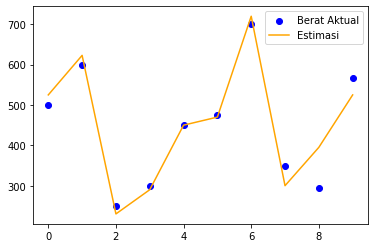

In [ ]:
import matplotlib.pyplot as plt

x = list(range(len(y)))

plt.scatter(x, y, color="blue", label="Berat Aktual")
plt.plot(x, ŷ, color="orange", label="Estimasi")
plt.legend()
plt.show()